In [6]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("Dataset/brain+normal.csv")
df = shuffle(df, random_state=42).reset_index(drop=True)

df.head(5)

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,brain,glioblastoma-cell-line,8.954299,8.720738,4.218188,6.422292,2.436403,6.943326,4.511851,5.182188,...,11.521705,11.278839,13.583215,13.392663,2.821228,2.498821,2.194591,1.897735,2.391953,2.507050
1,brain,pilocytic_astrocytoma,13.047655,8.345819,7.625373,10.285562,4.559898,9.057890,6.472992,6.786061,...,11.878733,11.329225,13.795016,13.579476,5.211523,5.110111,3.873402,3.635016,4.430390,4.745349
2,normal,normal,9.423163,5.926251,5.426112,8.159429,2.917920,5.912322,4.586172,4.726897,...,12.579815,11.967429,13.607348,13.499380,9.459282,8.126802,8.331143,2.501573,2.830156,2.638182
3,normal,normal,11.144357,6.704027,5.487660,8.535673,3.501449,8.968028,5.890635,4.662164,...,12.801107,12.216516,13.931976,13.888328,9.948418,5.505865,7.900195,3.300959,3.855687,3.709191
4,normal,normal,9.624991,6.076001,5.160825,10.339357,2.507324,7.348470,5.283554,4.628877,...,12.768751,12.143601,13.986814,13.884763,10.065036,7.756117,8.883504,2.467931,2.821364,2.838450


In [7]:
def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'brain': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y 

X,y = preprocessing(df)
display(X.head(5), X.shape)
display(y.head(5), y.shape)

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,8.954299,8.720738,4.218188,6.422292,2.436403,6.943326,4.511851,5.182188,2.805718,3.457399,...,11.521705,11.278839,13.583215,13.392663,2.821228,2.498821,2.194591,1.897735,2.391953,2.507050
1,13.047655,8.345819,7.625373,10.285562,4.559898,9.057890,6.472992,6.786061,5.742286,5.331549,...,11.878733,11.329225,13.795016,13.579476,5.211523,5.110111,3.873402,3.635016,4.430390,4.745349
2,9.423163,5.926251,5.426112,8.159429,2.917920,5.912322,4.586172,4.726897,5.097154,5.360167,...,12.579815,11.967429,13.607348,13.499380,9.459282,8.126802,8.331143,2.501573,2.830156,2.638182
3,11.144357,6.704027,5.487660,8.535673,3.501449,8.968028,5.890635,4.662164,7.769279,3.714961,...,12.801107,12.216516,13.931976,13.888328,9.948418,5.505865,7.900195,3.300959,3.855687,3.709191
4,9.624991,6.076001,5.160825,10.339357,2.507324,7.348470,5.283554,4.628877,4.398946,4.115761,...,12.768751,12.143601,13.986814,13.884763,10.065036,7.756117,8.883504,2.467931,2.821364,2.838450


(278, 54675)

0    1
1    1
2    0
3    0
4    0
Name: cancer_type, dtype: int64

(278,)

In [20]:
# Method 1: Variance Threshold (Assume Features with higher variance => better)
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
X_var = selector.fit_transform(X)

selected_feature_indices = selector.get_support(indices=True)
X_var = X.columns[selected_feature_indices]
print(f"Number of selected features: {len(X_var)}")
print(f"Selected features: {X_var}")

Number of selected features: 945
Selected features: Index(['219553_at', '216967_at', '1563863_x_at', '213845_at', '225485_at',
       '234866_s_at', '205282_at', '209742_s_at', '226271_at', '202986_at',
       ...
       '242595_at', '234215_at', '237235_at', '243949_at', '222405_at',
       '230280_at', '1568844_at', '207259_at', '203562_at', '229259_at'],
      dtype='object', length=945)


In [10]:
# Method 2: Unvariate feature selection method (Based on their relation with output)
# ANOVA f-statistics

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 1000 features based on ANOVA F-statistic
k_best_selector = SelectKBest(score_func=f_classif, k=500)
X_anova = k_best_selector.fit_transform(X, y)

# Get selected feature names
X_anova = X.columns[k_best_selector.get_support()]

print(f"Selected features: {X_anova}")

Selected features: Index(['219553_at', '216967_at', '213845_at', '225485_at', '205282_at',
       '226271_at', '202986_at', '226690_at', '209369_at', '231855_at',
       ...
       '213395_at', '233364_s_at', '203069_at', '236273_at', '222772_at',
       '225976_at', '222405_at', '230280_at', '203562_at', '229259_at'],
      dtype='object', length=500)


In [11]:
# Method 3: Mutual Information methnod (Non-linear relationship between predictors and targets)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 100 features based on Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_mut = mutual_info_selector.fit_transform(X, y) 

# Get selected feature names
X_mut = X.columns[mutual_info_selector.get_support()]

print(f"Selected features: {X_mut}")


Selected features: Index(['1563863_x_at', '234866_s_at', '209742_s_at', '226690_at', '1556502_at',
       '1554214_at', '1565771_at', '1563868_a_at', '240858_at', '207206_s_at',
       ...
       '1566852_at', '203069_at', '237693_at', '242595_at', '234215_at',
       '237235_at', '243949_at', '230280_at', '1568844_at', '207259_at'],
      dtype='object', length=500)


c:\Study\CS_539\Cancer_Detector\.venv\Lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


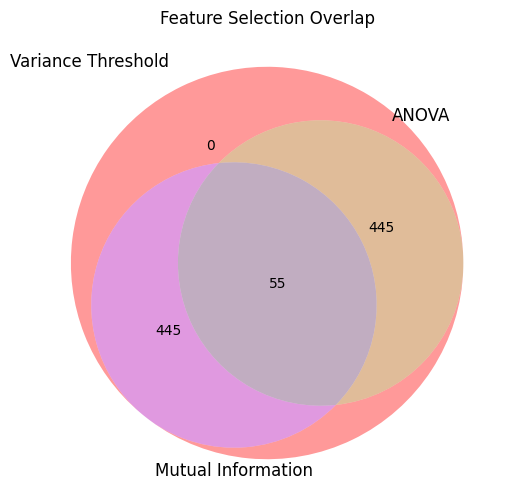

In [12]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  

# Convert numpy arrays to flattened lists for compatibility
variance_features = set(X_var.ravel())
anova_features = set(X_anova.ravel())
mutual_info_features = set(X_mut.ravel())

# Create a Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn_diagram = venn3(
    subsets=(
        len(variance_features - anova_features - mutual_info_features),  # Only Variance
        len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
        len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
        len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
        len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
        len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
        len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
    ),
    set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
)
plt.title("Feature Selection Overlap")
plt.show()


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform feature_selection (ANOVA, Mutual Information, Reduce Overlap)
def feature_selection(X,y):
    # Perform ANOVA
    k_best_selector = SelectKBest(score_func=f_classif, k=500)
    X_anova = k_best_selector.fit_transform(X,y)
    X_anova = X.columns[k_best_selector.get_support()]
    
    # Perform Mutual Information
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
    X_mut = mutual_info_selector.fit_transform(X,y)
    X_mut = X.columns[mutual_info_selector.get_support()]
    
    # # Reduce overlap
    # X_reduce = set(X_anova).difference(set(X_mut))
    # X_reduce = X[list(X_reduce)]
    
    # X_reduce = X_anova.intersection(X_mut)  # Features in both ANOVA and Mutual Information
    # X_reduce = X[list(X_reduce)]  # Subset of data with overlapping features
    
    combined_features = set(X_anova).union(set(X_mut)).union(set(X_var))
    X_reduce = X[list(combined_features)]  # Subset the data to include combined features
    
    return X_reduce

X = feature_selection(X,y)
display(X.head(5))

,225485_at,213845_at,205282_at,209742_s_at,202986_at,226690_at,231855_at,235411_at,1554214_at,1563868_a_at,...,203453_at,1553720_a_at,244853_at,203069_at,236273_at,242595_at,243949_at,230280_at,207259_at,203562_at
0,7.731866,7.134067,5.973637,2.256053,7.448623,2.638874,6.150524,5.472472,1.906444,2.522982,...,3.041961,4.616326,2.529443,7.746148,6.369644,2.625600,2.101357,2.126048,2.209276,5.512965
1,8.559233,9.427302,8.279557,5.233214,11.398339,11.180383,6.188099,6.968092,5.021437,5.399078,...,5.708232,9.569275,6.232043,11.152615,8.462289,5.675834,4.160721,8.278186,4.264288,12.872540
2,4.220189,4.270045,3.768384,3.143723,4.118020,4.378294,2.807968,3.207239,3.808033,3.862157,...,8.072680,5.051212,3.299653,5.107223,4.643697,3.397029,2.596212,2.382327,3.113759,4.568007
3,6.566451,4.034338,4.543284,3.936429,4.866092,4.394180,4.367269,3.813501,4.003339,4.481649,...,12.628065,5.249659,3.612464,5.327212,8.409873,3.817952,3.485576,3.895643,10.707326,5.451399
4,5.475375,4.700153,3.400468,3.145569,7.131179,4.069714,3.001709,5.169069,3.306221,3.595220,...,10.182168,5.137896,3.328923,4.608705,5.295864,3.427308,2.766707,2.442411,3.009441,6.453505


In [22]:
# Model train: Logistic Regression, L1 Regularization, 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Define Training Pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42))
])

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Append scores
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    fold += 1

In [23]:
# Final Train accuracy

# Print average metrics across folds
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")


Cross-Validation Results:
Mean Accuracy: 0.99 ± 0.01
Mean Recall: 0.99 ± 0.01
Mean F1 Score: 0.99 ± 0.01
Mean ROC-AUC: 1.00 ± 0.00


In [28]:
import pandas as pd
from sklearn.utils import shuffle

# Load and shuffle the dataset
test_breast = pd.read_csv("Dataset/brain_test_data.csv")
X_test, y_test = preprocessing(test_breast)
X_test = X_test[X.columns]
display(X_test, y_test)

,225485_at,213845_at,205282_at,209742_s_at,202986_at,226690_at,231855_at,235411_at,1554214_at,1563868_a_at,...,203453_at,1553720_a_at,244853_at,203069_at,236273_at,242595_at,243949_at,230280_at,207259_at,203562_at
0,9.256180,7.695161,6.556874,5.350955,10.033796,11.123323,6.098647,5.943971,4.941787,5.878185,...,9.654528,8.365392,6.632568,8.007024,7.954711,6.202131,4.367583,5.646463,4.520754,10.600489
1,7.887508,8.397399,8.352133,4.930555,10.738724,12.653884,6.183194,6.760621,4.971065,5.407539,...,6.952914,11.263575,4.913229,8.829040,8.578122,5.394809,4.262019,8.128973,4.028548,12.908534
2,9.439165,10.298578,9.779038,5.325287,11.177653,10.640117,6.580260,7.178427,5.083159,5.457739,...,5.224575,10.366345,5.659991,11.813272,8.113530,5.495718,4.373314,10.649381,4.350590,12.659154
3,10.110766,6.948553,7.857006,5.187778,10.642258,12.206014,6.298753,7.528695,4.846181,5.240288,...,7.010634,10.632635,5.717094,9.731010,8.895181,5.368147,4.355075,6.773092,4.343742,12.281672
4,8.283725,11.248123,9.755802,5.323316,9.893937,10.465062,6.344075,7.410385,5.299170,5.561102,...,5.408695,10.765600,5.744674,11.775996,9.081344,5.910653,4.386117,10.062149,4.351726,12.786254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,8.392613,5.809520,8.022413,7.866197,7.236389,7.389974,6.211723,5.625108,5.796541,6.331510,...,12.538039,7.924667,6.763212,7.812005,6.927565,6.230585,5.090154,4.898253,5.332818,9.513057
63,7.944810,5.938727,7.220112,14.446504,7.381889,8.047946,5.574201,5.374189,5.737719,6.386926,...,11.645345,7.847201,7.532361,7.750870,7.077395,6.256978,4.890018,5.300579,5.302404,9.030525
64,2.762942,4.929310,2.627546,3.368788,4.000501,3.619805,4.401878,2.676918,2.453085,3.210650,...,6.340465,4.508192,3.171907,5.132722,4.828738,3.160440,2.928559,2.533274,2.915641,3.015584
65,3.228865,5.190117,2.653716,3.419350,4.463981,3.814904,4.618123,2.405804,2.594362,3.335171,...,5.106887,4.636736,3.566154,5.320783,4.840320,3.271520,2.410761,2.754096,2.629068,3.335676


0     1
1     1
2     0
3     1
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Name: cancer_type, Length: 67, dtype: int64

In [29]:
# Predict using the final trained model
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("\nFinal Model Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Final Model Evaluation on Test Dataset:
Accuracy: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        15

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [30]:
import pandas as pd

# Create the report dataframe
report_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Probability (Bladder)': y_pred_prob
})

# Save the report to the Dataset directory
output_path = "Dataset/test_set_prediction_report.csv"
report_df.to_csv(output_path, index=False)

print(f"Prediction report saved to {output_path}")


Prediction report saved to Dataset/test_set_prediction_report.csv


In [31]:
import pandas as pd
import numpy as np

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# For each sample predicted as bladder cancer (class 1)
for i, (pred, prob) in enumerate(zip(y_pred, y_pred_prob)):
    if pred == 1:  # Only consider predictions for class 1 (bladder cancer)
        sample_features = X_test.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Calculate feature contributions
        
        # Create a DataFrame for contributions
        contribution_df = pd.DataFrame({
            'Feature': feature_names,
            'Contribution': contributions
        }).sort_values(by='Contribution', ascending=False)  # Sort by contribution
        
        # Print details for the sample
        print(f"\nSample {i}: Predicted Probability (Bladder): {prob:.4f}")
        print("Top Contributing Genes:")
        print(contribution_df.head(10))  # Display top 10 genes for this sample



Sample 0: Predicted Probability (Bladder): 0.8533
Top Contributing Genes:
         Feature  Contribution
140    225655_at      2.069237
656    204469_at      1.396709
652    206373_at      0.891377
630    203440_at      0.846878
767  204914_s_at      0.803944
14   204913_s_at      0.780662
672    222803_at      0.750048
719    232007_at      0.734004
677     48808_at      0.691083
627    218252_at      0.577950

Sample 1: Predicted Probability (Bladder): 0.9964
Top Contributing Genes:
         Feature  Contribution
140    225655_at      2.195530
656    204469_at      1.511616
652    206373_at      1.048553
672    222803_at      0.966911
630    203440_at      0.928169
719    232007_at      0.912213
767  204914_s_at      0.814875
677     48808_at      0.775312
318    230272_at      0.770669
14   204913_s_at      0.755042

Sample 3: Predicted Probability (Bladder): 0.9827
Top Contributing Genes:
         Feature  Contribution
140    225655_at      2.505698
656    204469_at      1.479886


C:\Users\caoth\AppData\Local\Temp\ipykernel_22340\2334918793.py:27: RuntimeWarning: Mean of empty slice.
  mean_contributions = contributions_array.mean(axis=0)  # Average contributions
c:\Study\CS_539\Cancer_Detector\.venv\Lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


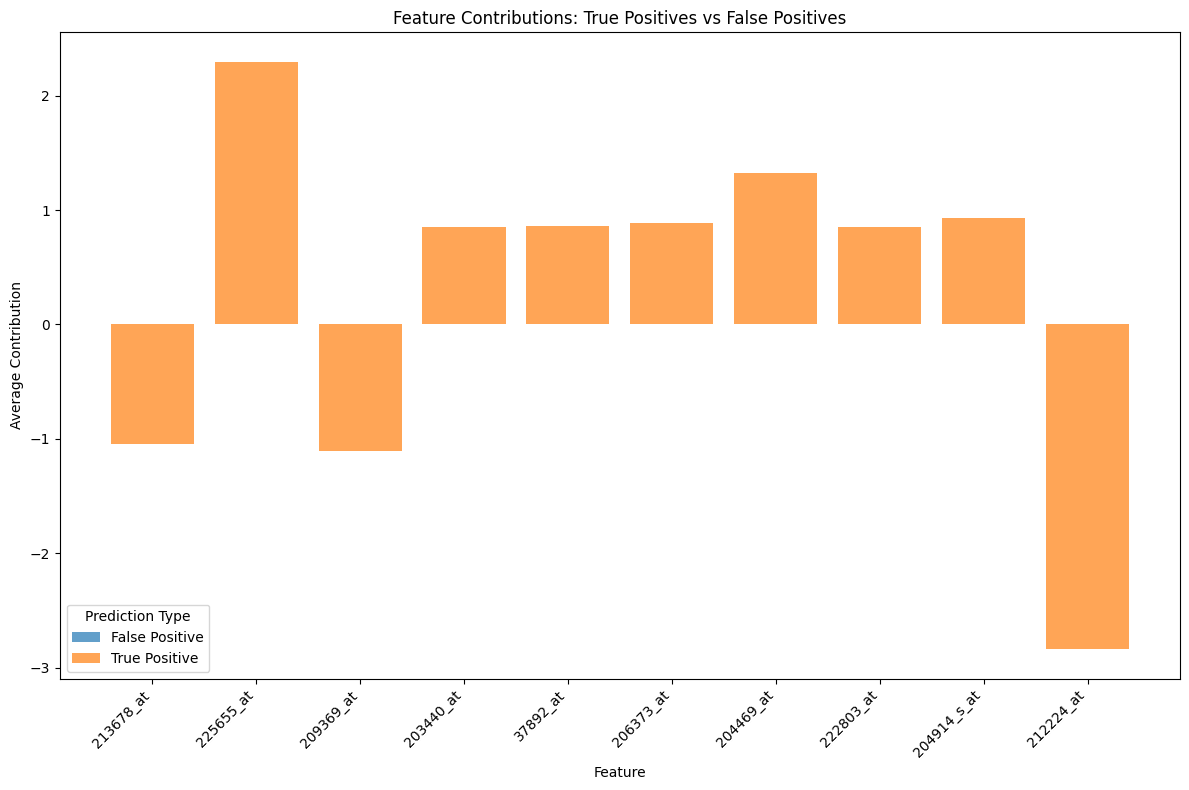

In [32]:
# Visualize the difference between gene pattern of TP and FP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# Identify TP and FP indices
TP_indices = np.where((y_test == 1) & (y_pred == 1))[0]  # True Positives
FP_indices = np.where((y_test == 0) & (y_pred == 1))[0]  # False Positives

# Function to calculate mean contributions
def calculate_mean_contributions(indices, X, coefficients, feature_names):
    contributions_list = []
    for i in indices:
        sample_features = X.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Feature contributions
        contributions_list.append(contributions)
    contributions_array = np.array(contributions_list)
    mean_contributions = contributions_array.mean(axis=0)  # Average contributions
    return pd.DataFrame({'Feature': feature_names, 'Contribution': mean_contributions})

# Calculate average contributions for TP and FP
TP_contributions = calculate_mean_contributions(TP_indices, X_test, coefficients, feature_names)
FP_contributions = calculate_mean_contributions(FP_indices, X_test, coefficients, feature_names)

# Combine data for plotting
TP_contributions['Type'] = 'True Positive'
FP_contributions['Type'] = 'False Positive'
combined_contributions = pd.concat([TP_contributions, FP_contributions])

# Select top features by absolute contribution
top_features = combined_contributions.groupby('Feature')['Contribution'].apply(lambda x: x.abs().mean()).nlargest(10).index
plot_data = combined_contributions[combined_contributions['Feature'].isin(top_features)]

# Plot
plt.figure(figsize=(12, 8))
for label, group in plot_data.groupby('Type'):
    plt.bar(group['Feature'], group['Contribution'], label=label, alpha=0.7)

plt.title("Feature Contributions: True Positives vs False Positives")
plt.ylabel("Average Contribution")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Prediction Type")
plt.tight_layout()
plt.show()


In [33]:
# Save model

import joblib
joblib.dump(pipeline, 'brain.joblib')

['brain.joblib']